# Plot the MCMC results

## Import libraries

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load files

In [2]:
## [1] Final output
posterior_file_dir = '../posterior_output.csv'

params=["pathNo","E_mu", "beta", "sigma_y", "sigma_mu", "rho"]
data_fin = pd.read_csv(posterior_file_dir,skiprows=3, delimiter=",", names=params)
data_fin.drop(data_fin.tail(1).index,inplace=True)
data_fin=data_fin.drop(columns=["pathNo"])
data_fin=data_fin.astype(float)

## [2] Iteration log file
log_file_dir='../log/MCMC_log_simul_2.csv'

first_period=300
burnin_period=10000

params=["E_mu", "beta", "sigma_y", "sigma_mu", "rho"]
data = pd.read_csv(log_file_dir,skiprows=1, delimiter=",", names=params)
data.drop(data.tail(1).index,inplace=True)
data=data.astype(float)
n=len(data)

## [3] Simulated true path and final latent mu
simul_file_dir ='../log/simul_path_2.csv'
latent_file_dir = '../log/MCMC_log_latent_2.csv'

simul_column=["Y", "mu"]
latent_column=["last","mean"]
data_simul = pd.read_csv(simul_file_dir,skiprows=3, delimiter=",", names=simul_column)
data_latent = pd.read_csv(latent_file_dir,skiprows=1,names=latent_column)

## Table

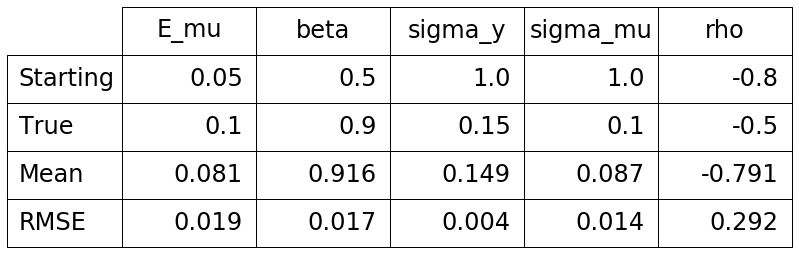

In [3]:
## Row 1: Guess
params=["name","E_mu", "beta", "sigma_y", "sigma_mu", "rho"]
init_param = pd.read_csv(posterior_file_dir,skiprows=2, nrows=1, delimiter=",", names=params)
init_param = init_param.drop(columns=["name"])
init_param = init_param.astype(float)
init_param = init_param.to_numpy()[0]
E_mu_init=init_param[0]
beta_init=init_param[1]
sigma_y_init=init_param[2]
sigma_mu_init=init_param[3]
rho_init=init_param[4]
row1=init_param.tolist()

## Row 2: True
true_param = pd.read_csv(posterior_file_dir,skiprows=1, nrows=1, delimiter=",", names=params)
true_param = true_param.drop(columns=["name"])
true_param = true_param.astype(float)
true_param=true_param.to_numpy()[0]
row2=true_param.tolist()

## Row 3: Mean
final_posterior_mean=data_fin.mean()
final_posterior_mean=final_posterior_mean.tolist()
row3=["%.3f" % member for member in final_posterior_mean]

## Row 4: RMSE
posterior_bias=np.array(row2).astype(float)-np.array(row3).astype(float)
posterior_var=data_fin.var()
posterior_RMSE=np.sqrt(pow(posterior_bias,2)+posterior_var)
posterior_RMSE=posterior_RMSE.tolist()
row4=["%.3f" % member for member in posterior_RMSE]

fig = plt.figure()
ax = fig.add_subplot(111)

col_labels = ("E_mu", "beta", "sigma_y", "sigma_mu", "rho")
row_labels = ("Starting", "True","Mean","RMSE")
table_vals=[row1,row2,row3,row4]

# Draw table
the_table = plt.table(cellText=table_vals,
                      colWidths=[0.1] * 5,
                      rowLabels=row_labels,
                      colLabels=col_labels,
                      loc="center")
the_table.auto_set_font_size(False)
the_table.set_fontsize(24)
the_table.scale(4, 4)

# Removing ticks and spines enables you to get the figure only with table
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
    
plt.savefig('posterior_output.png', bbox_inches='tight', pad_inches=0.05)

## Chain plots

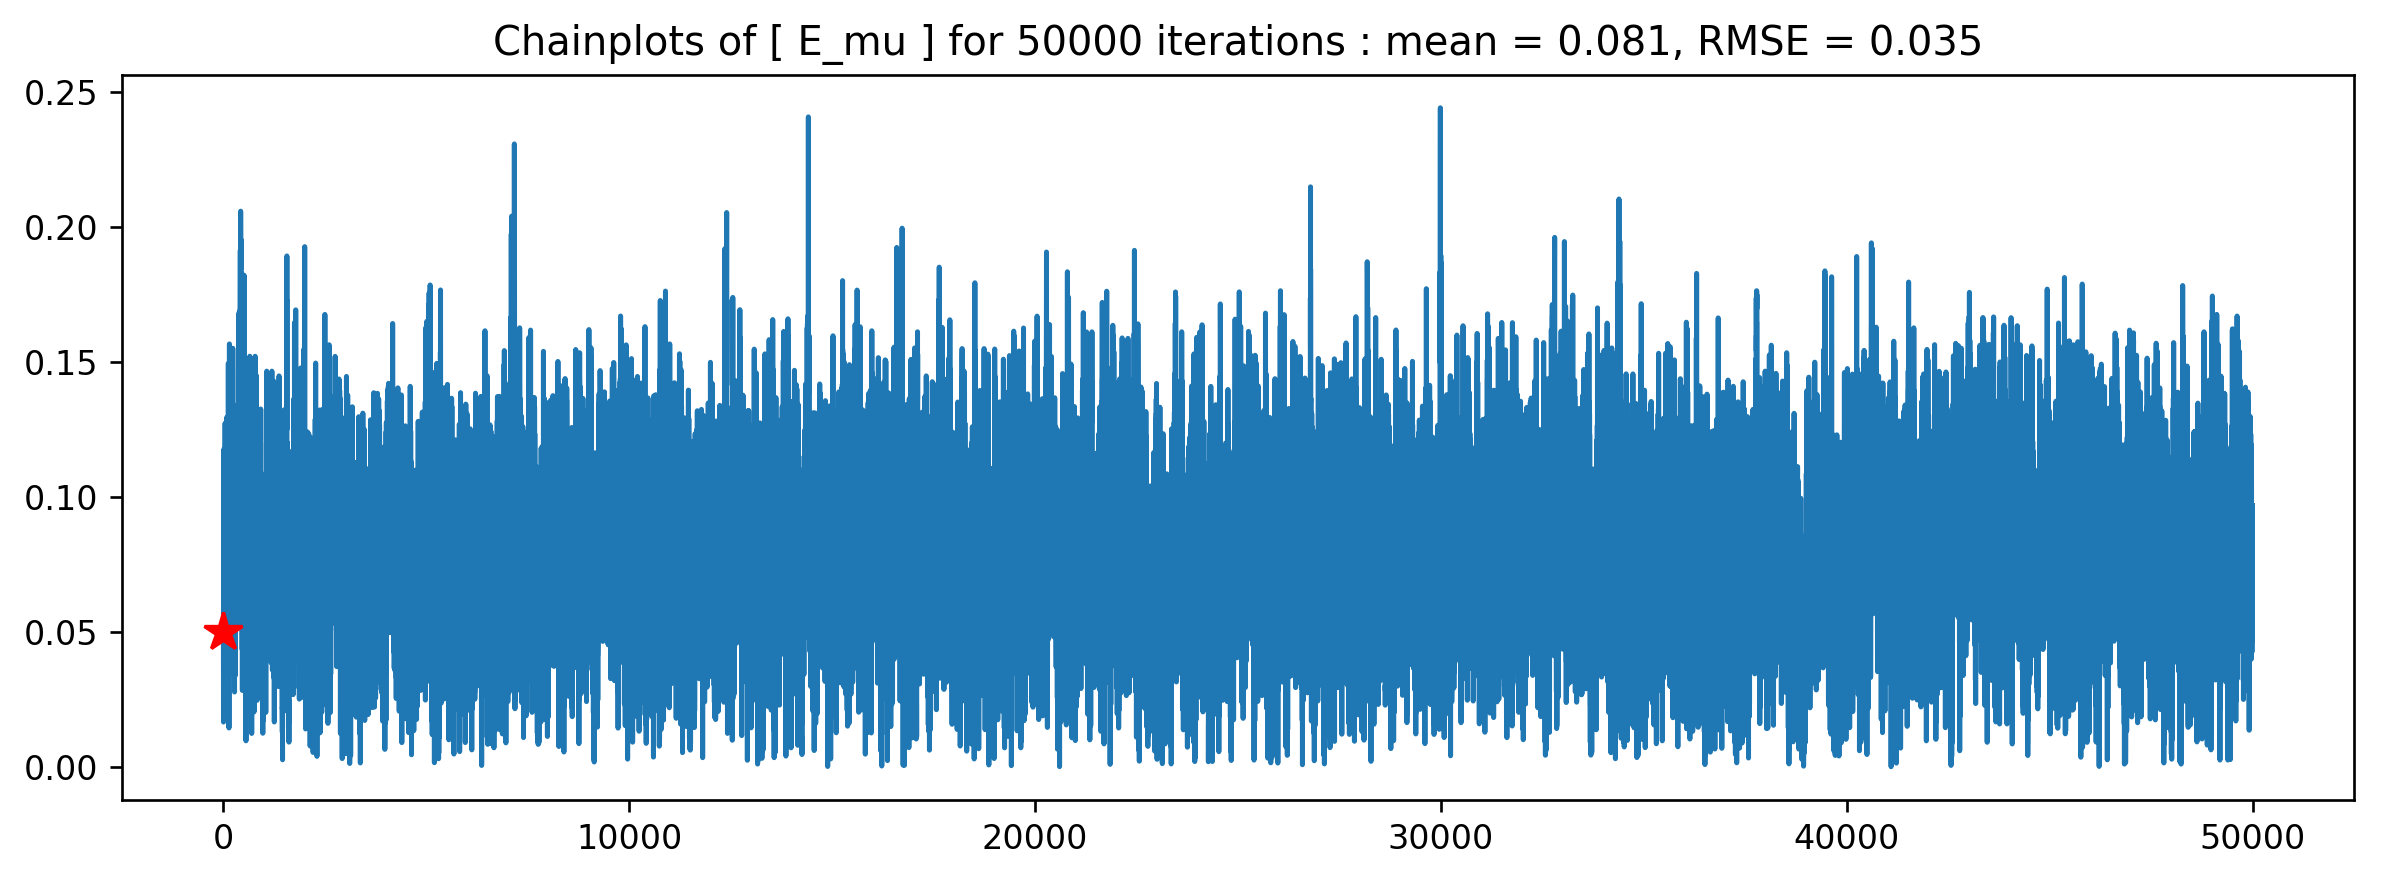

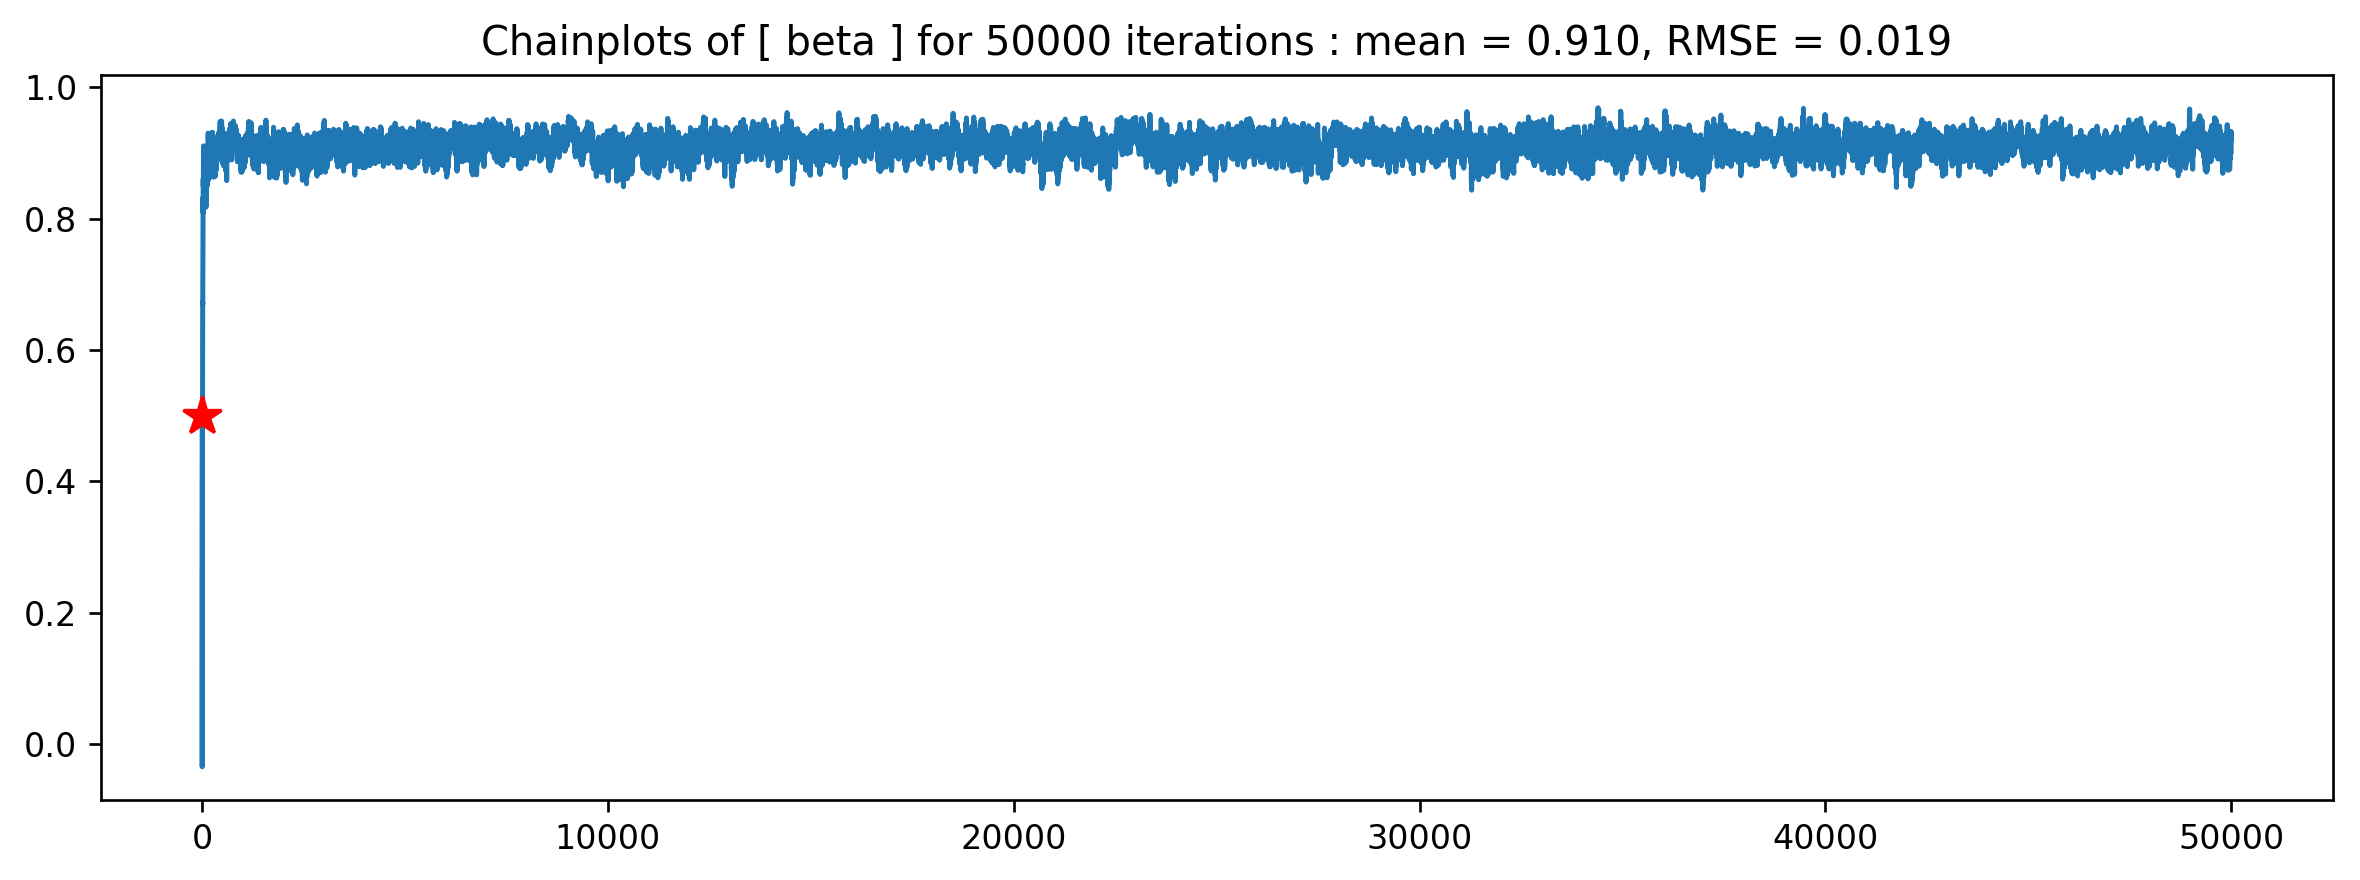

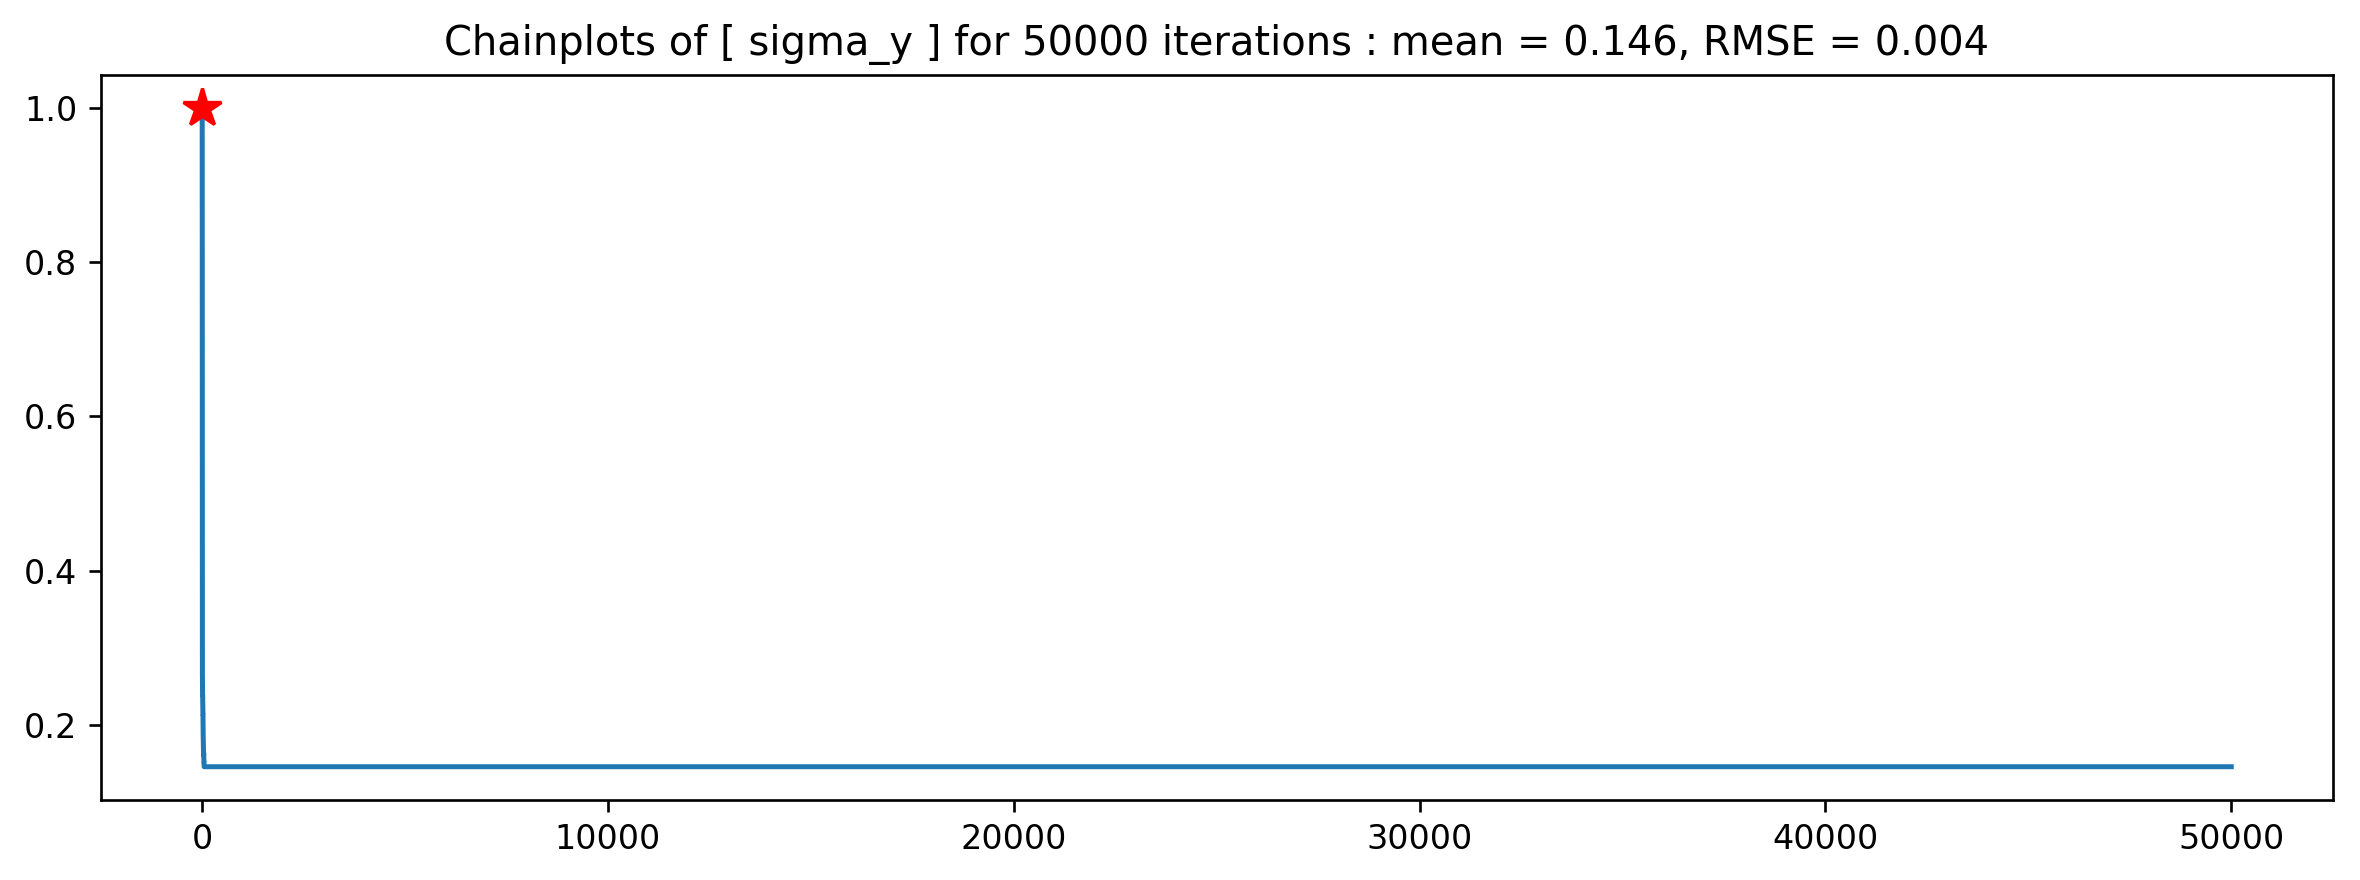

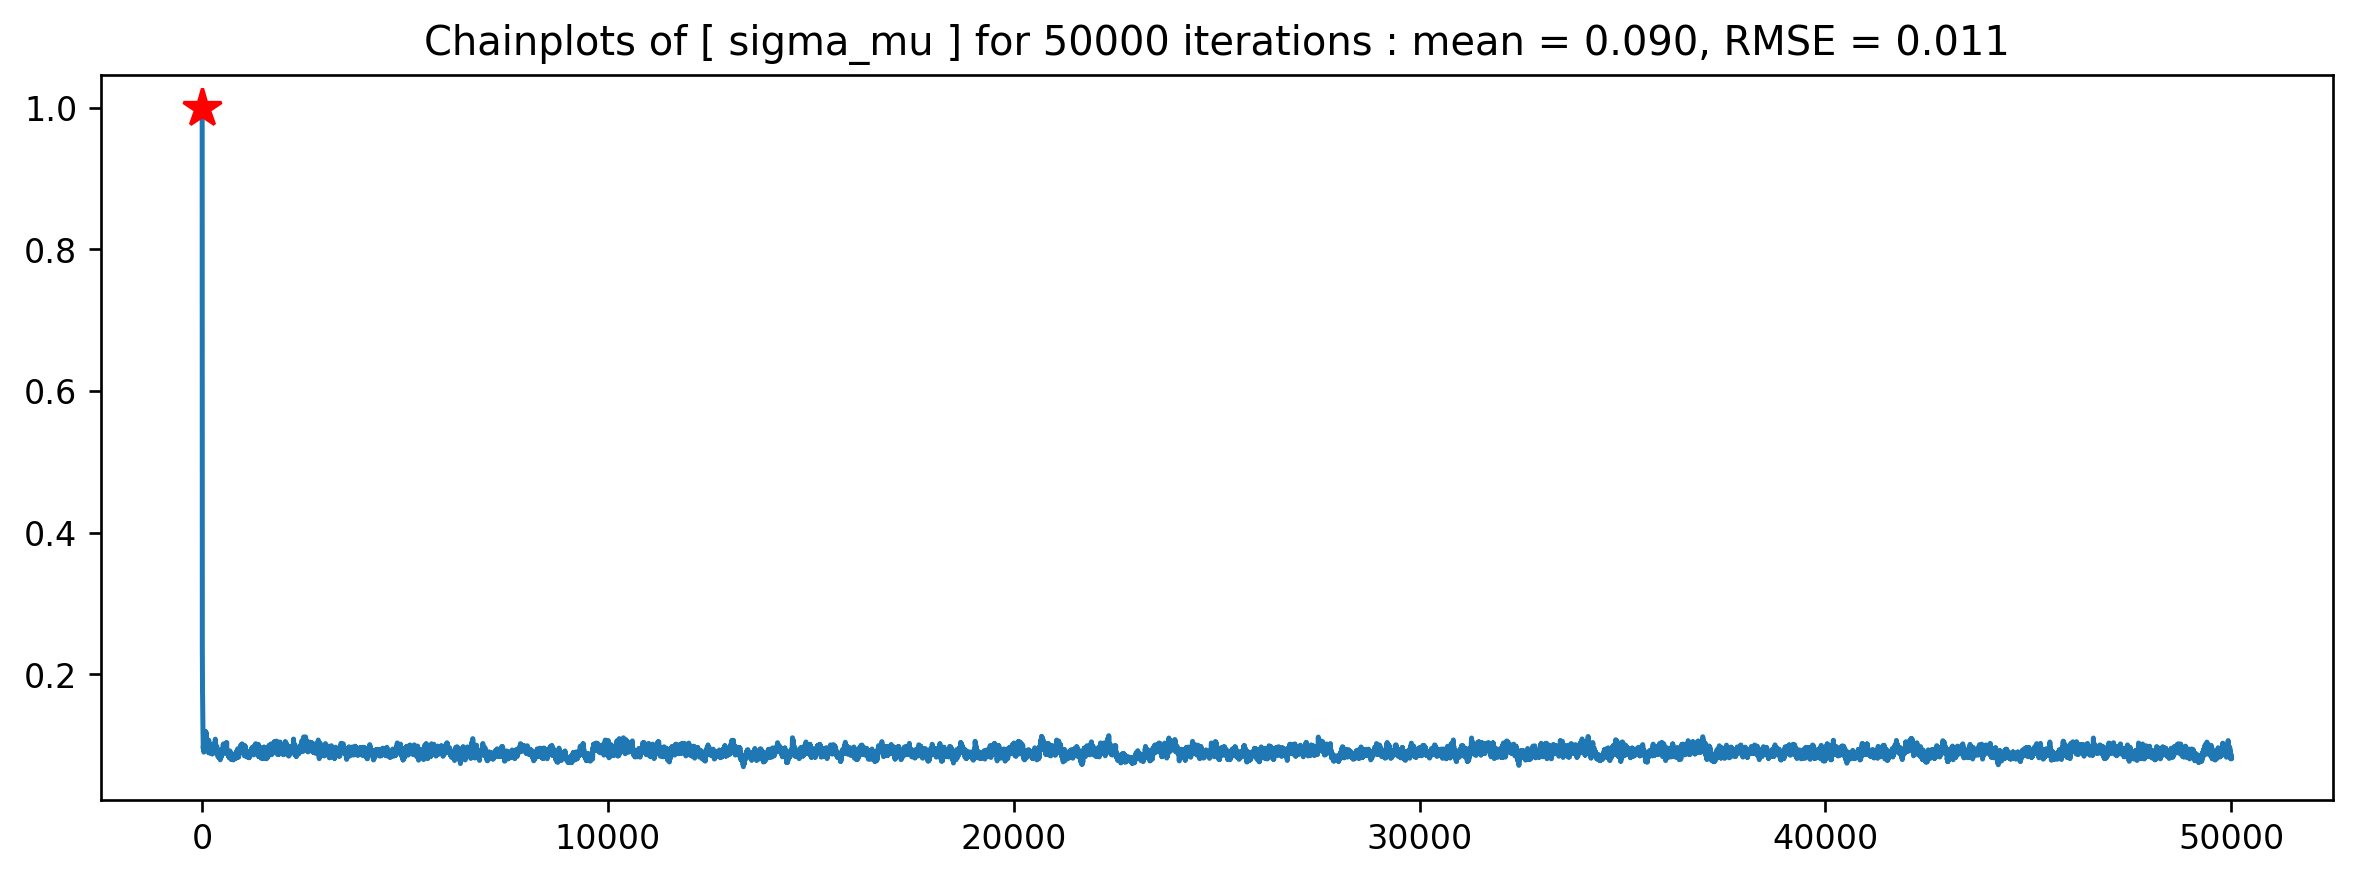

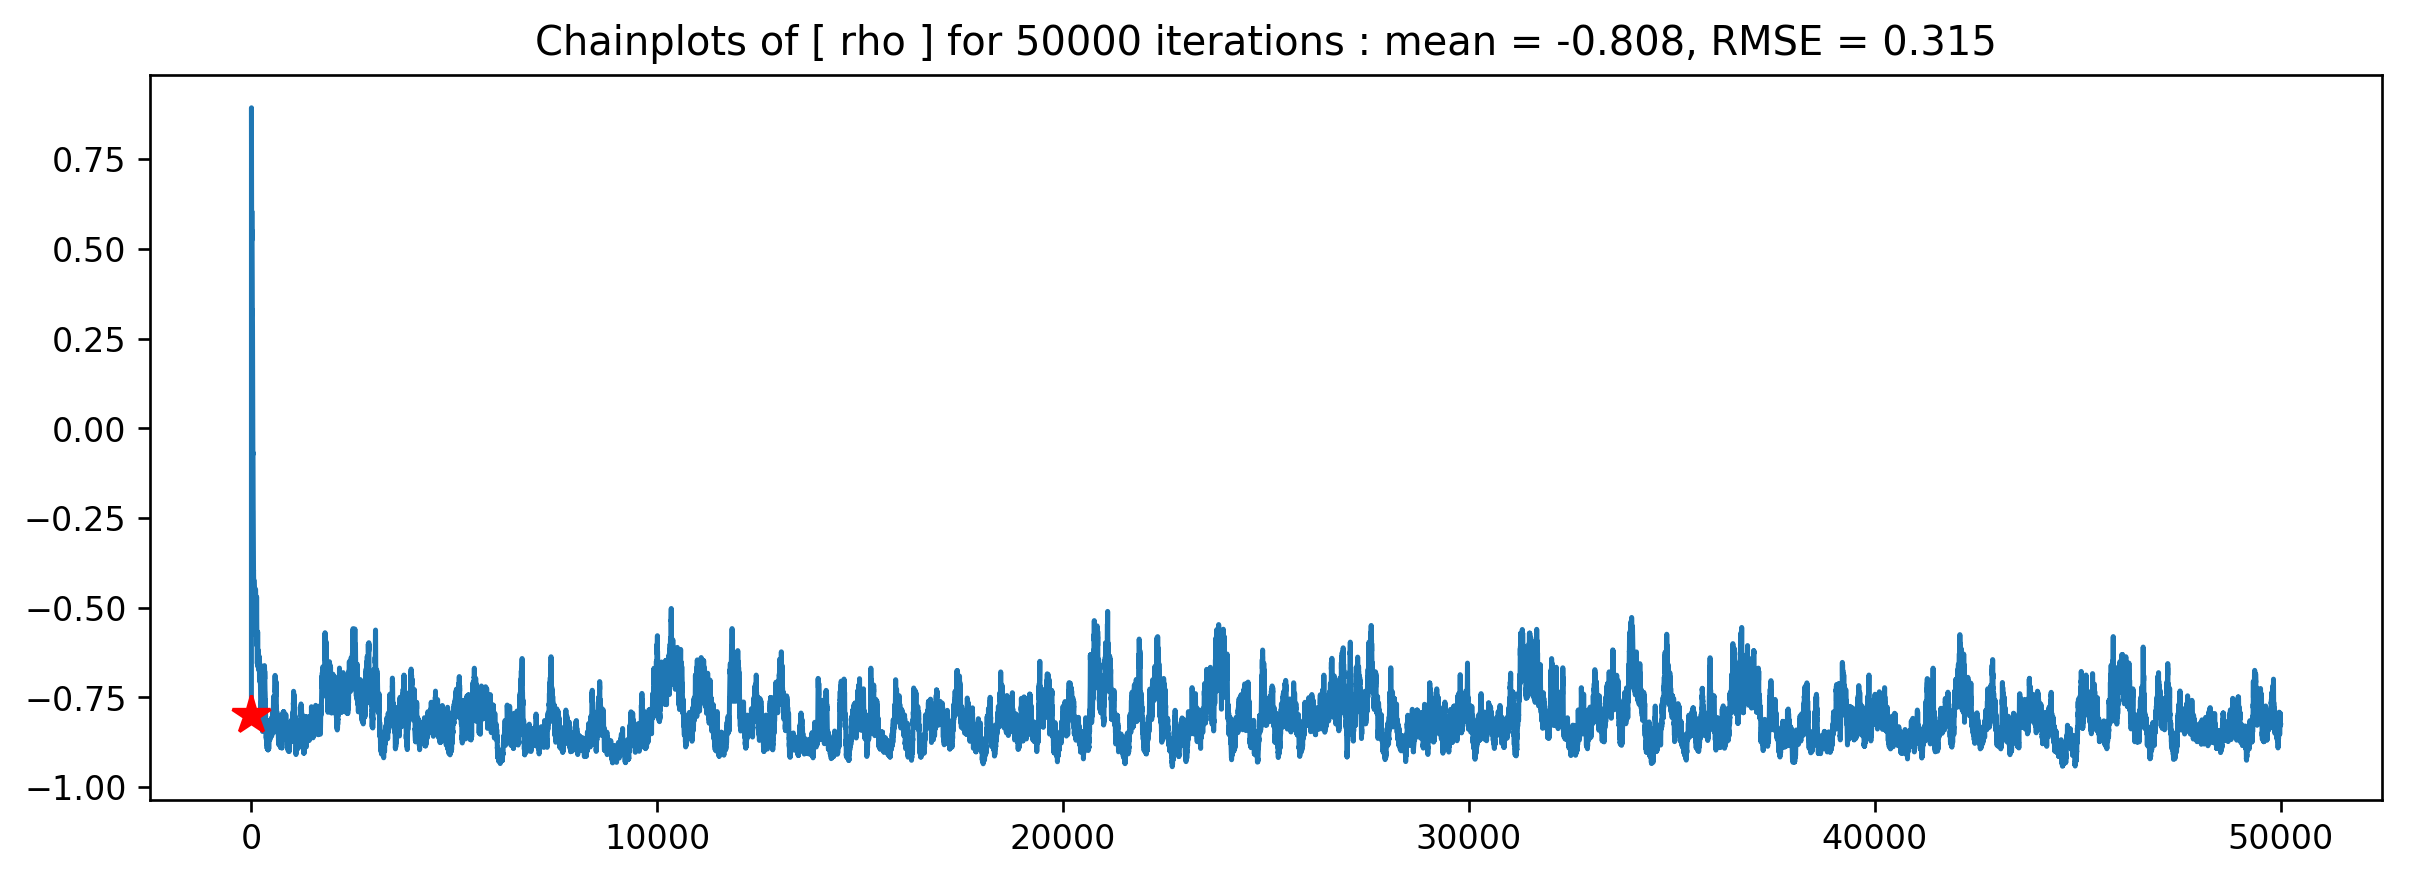

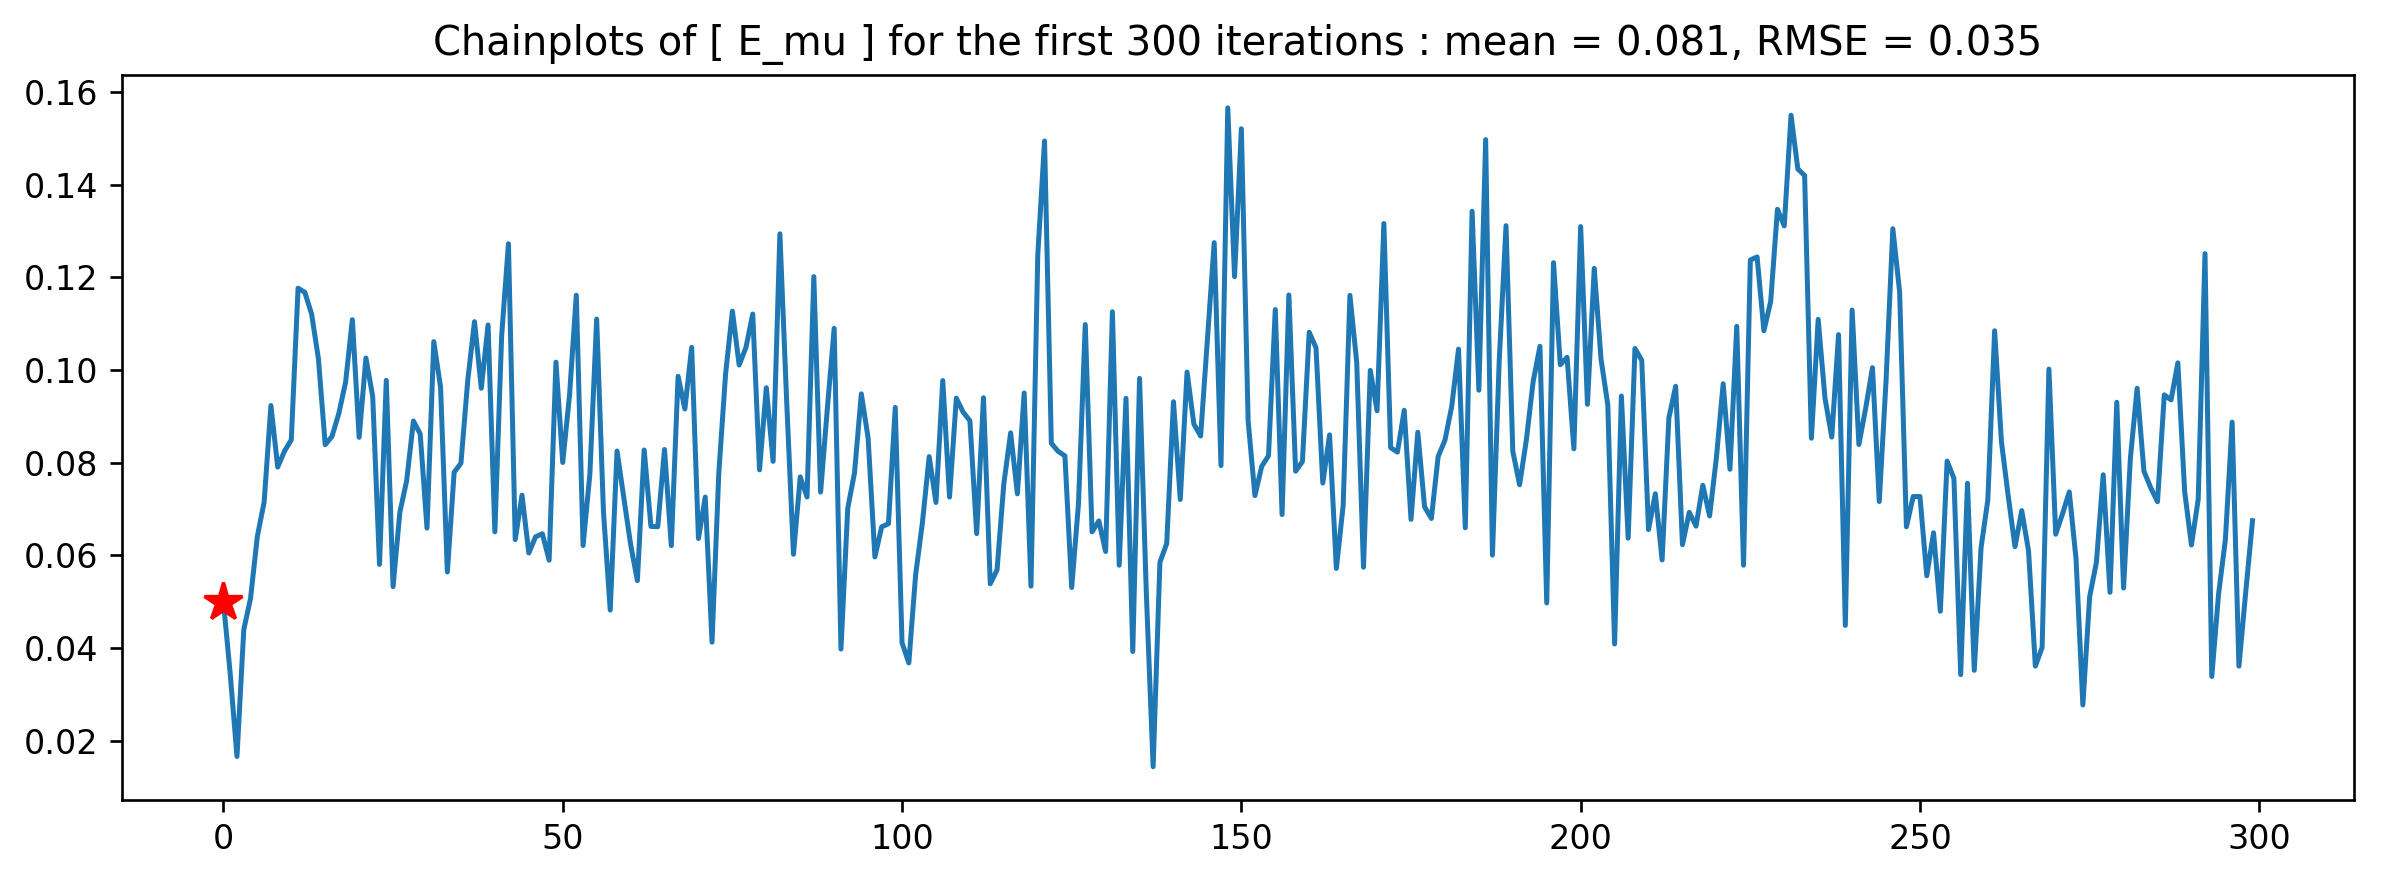

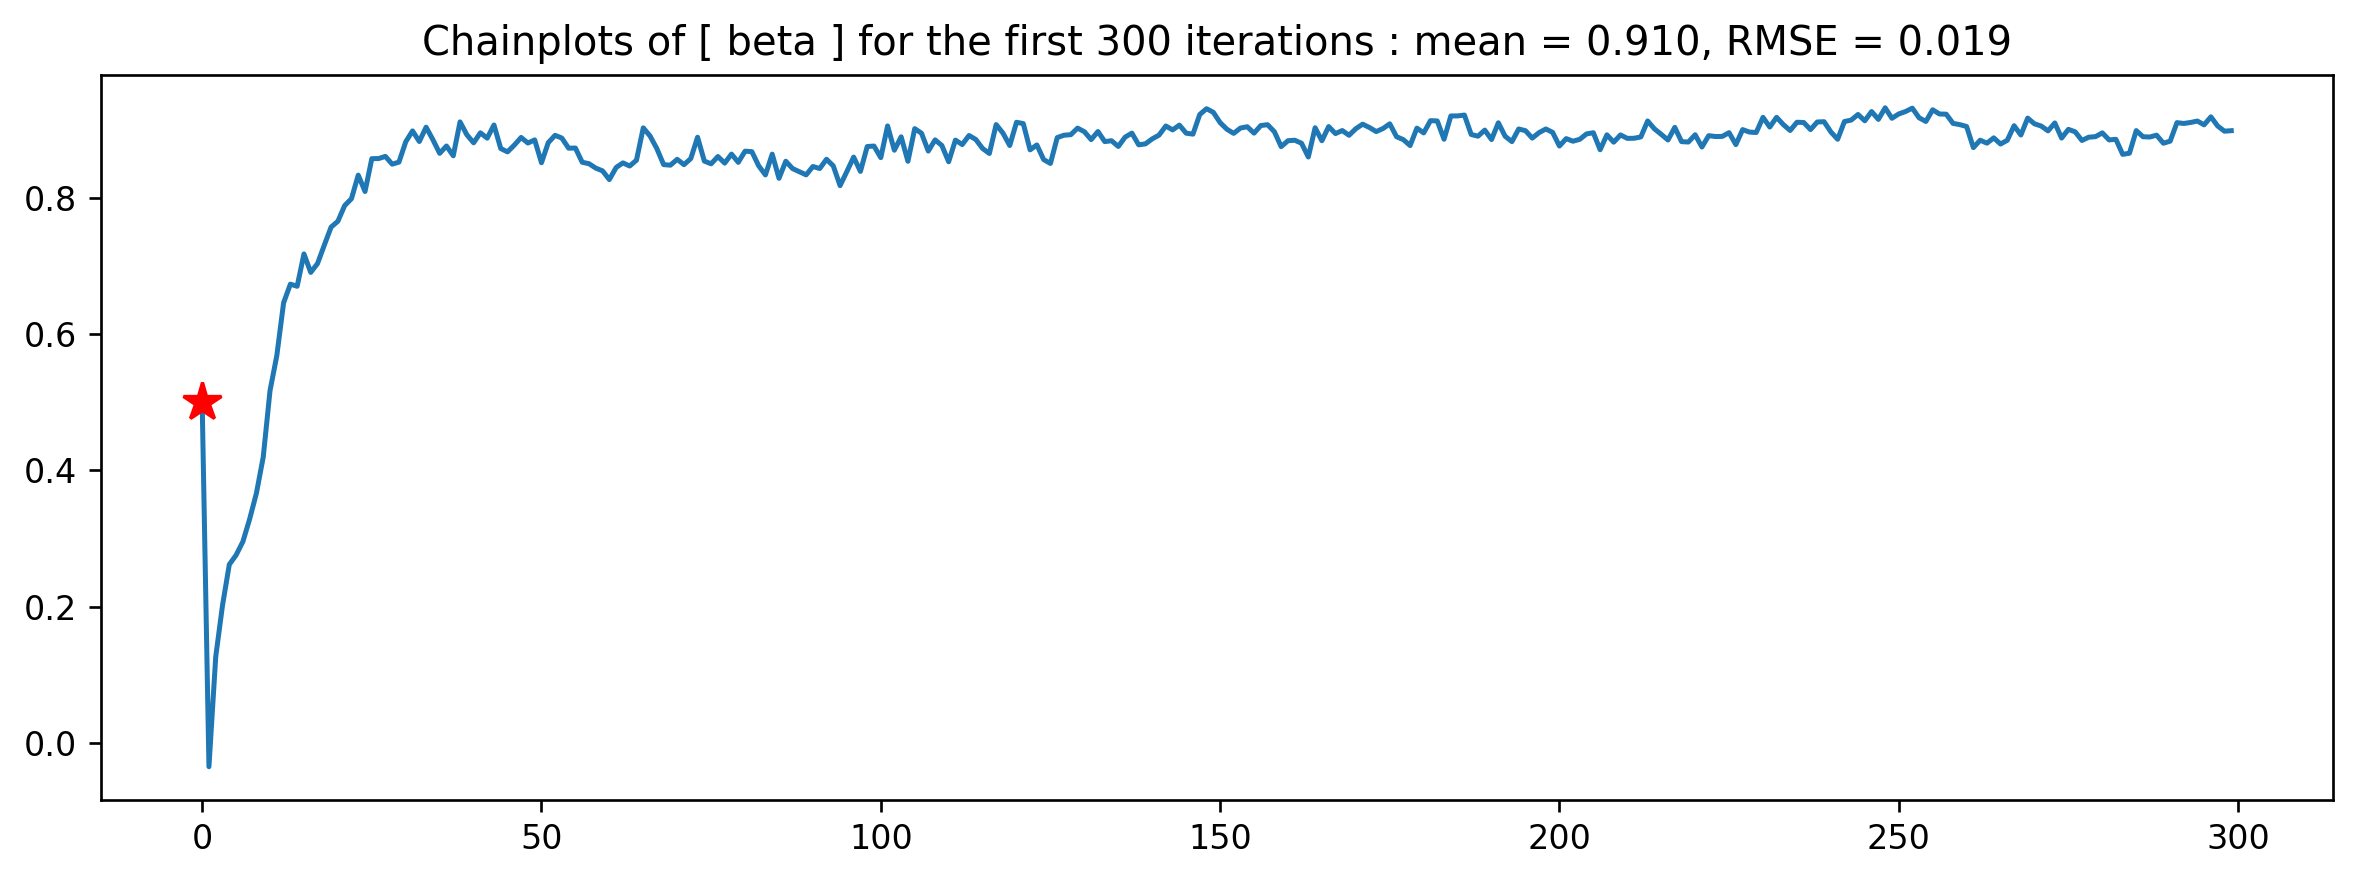

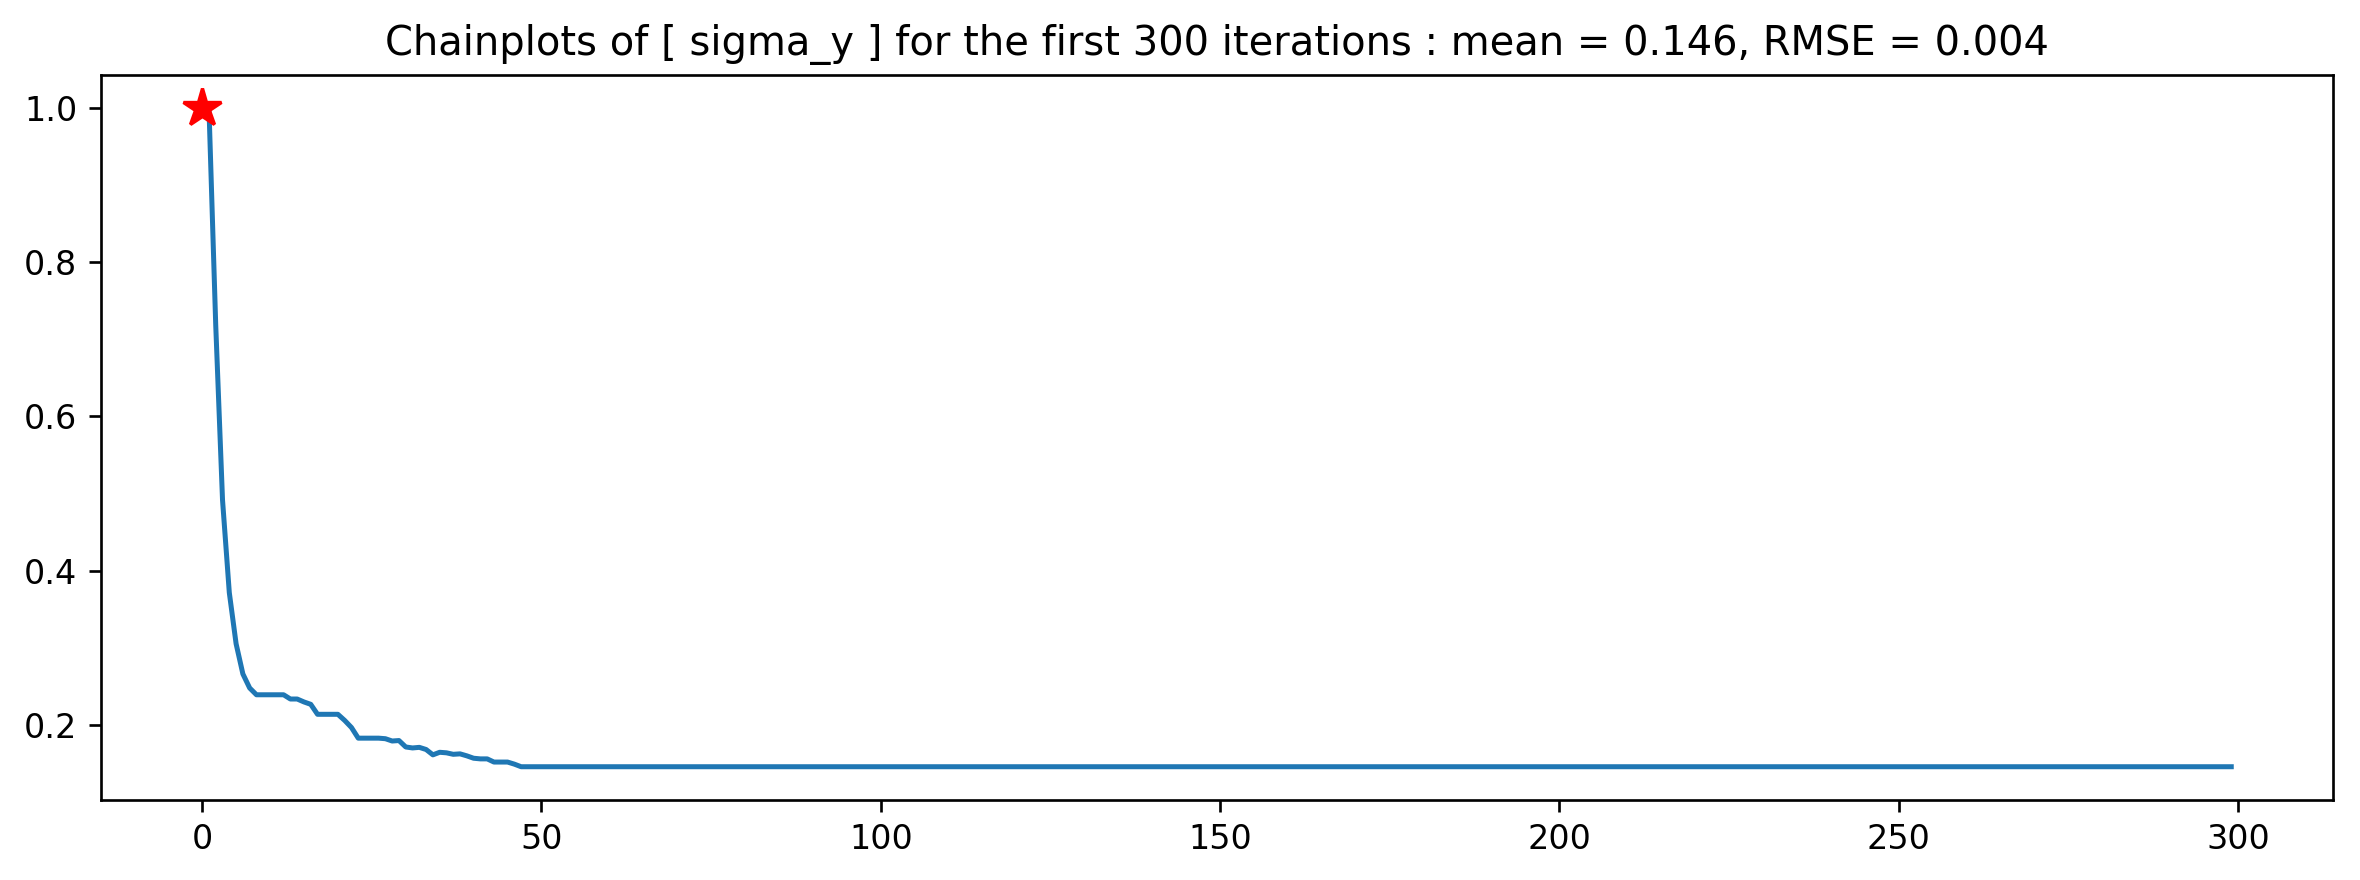

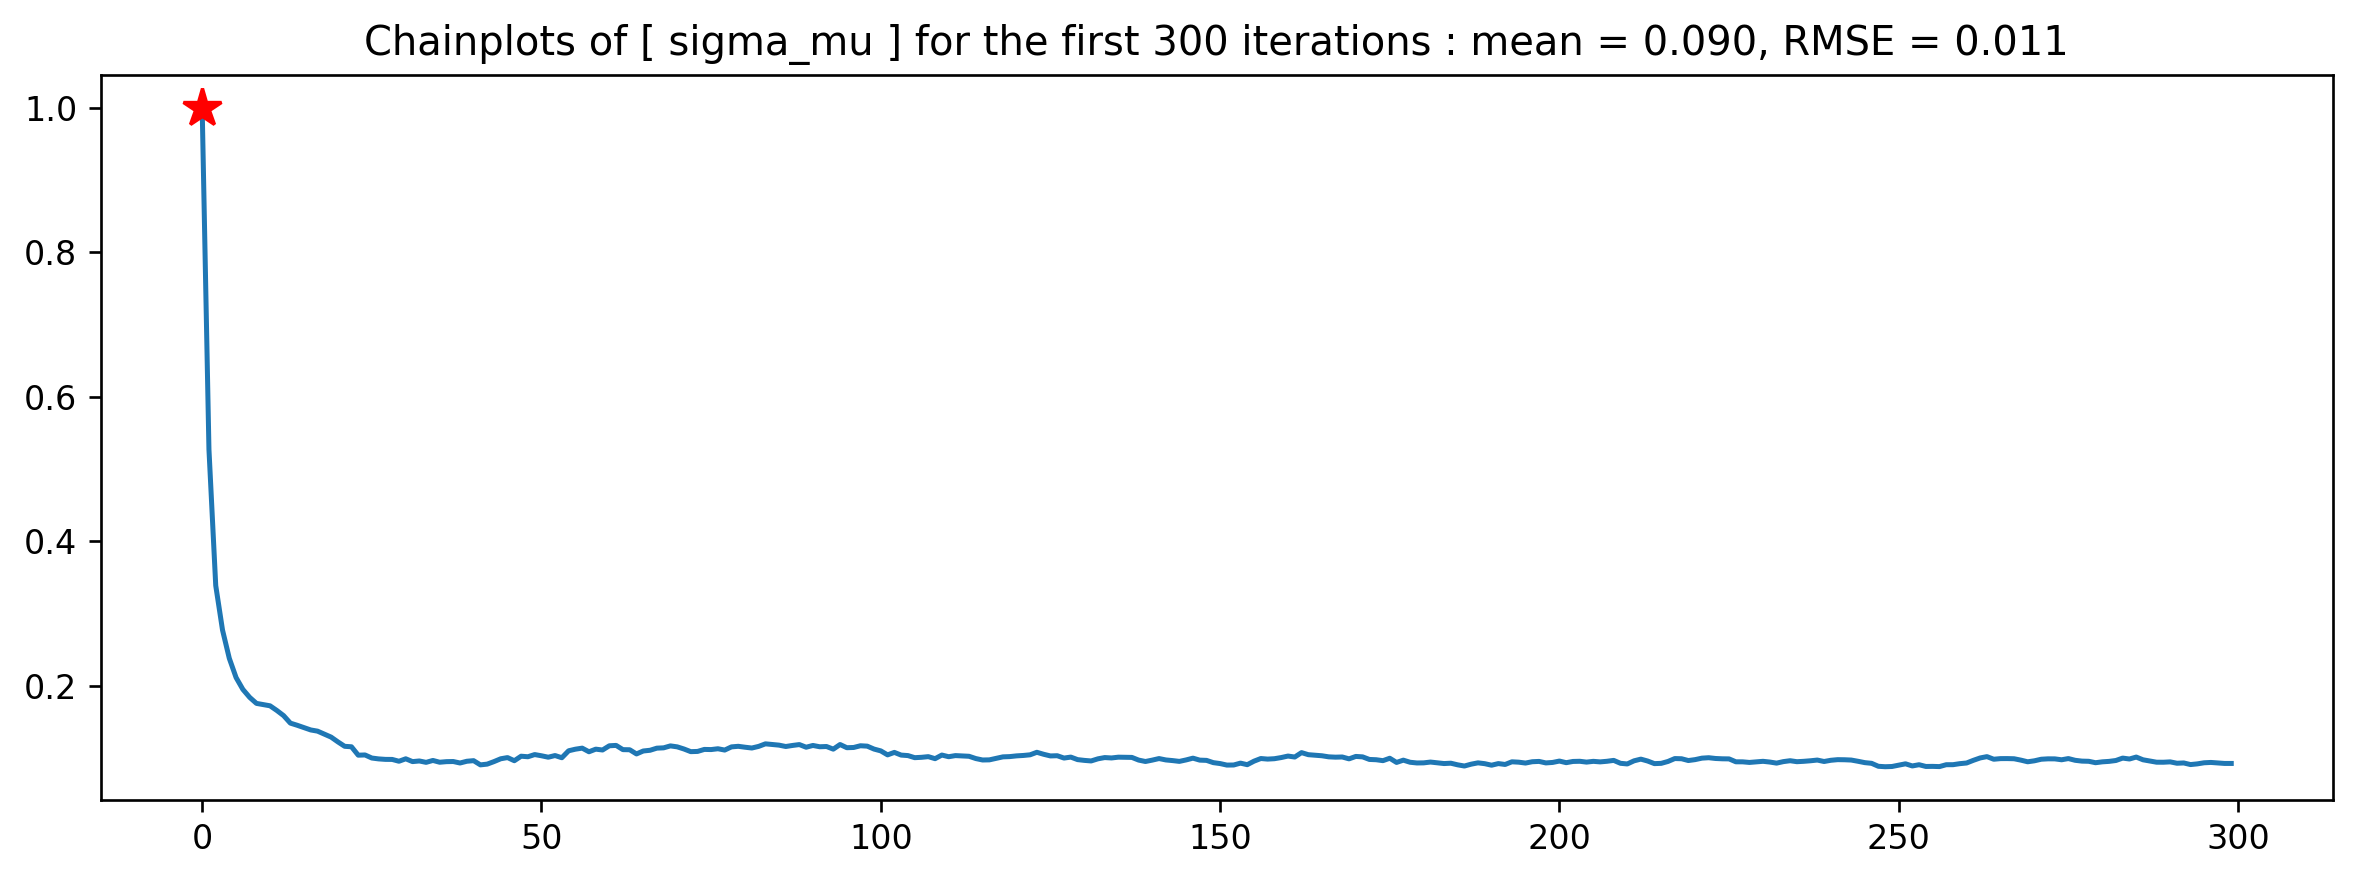

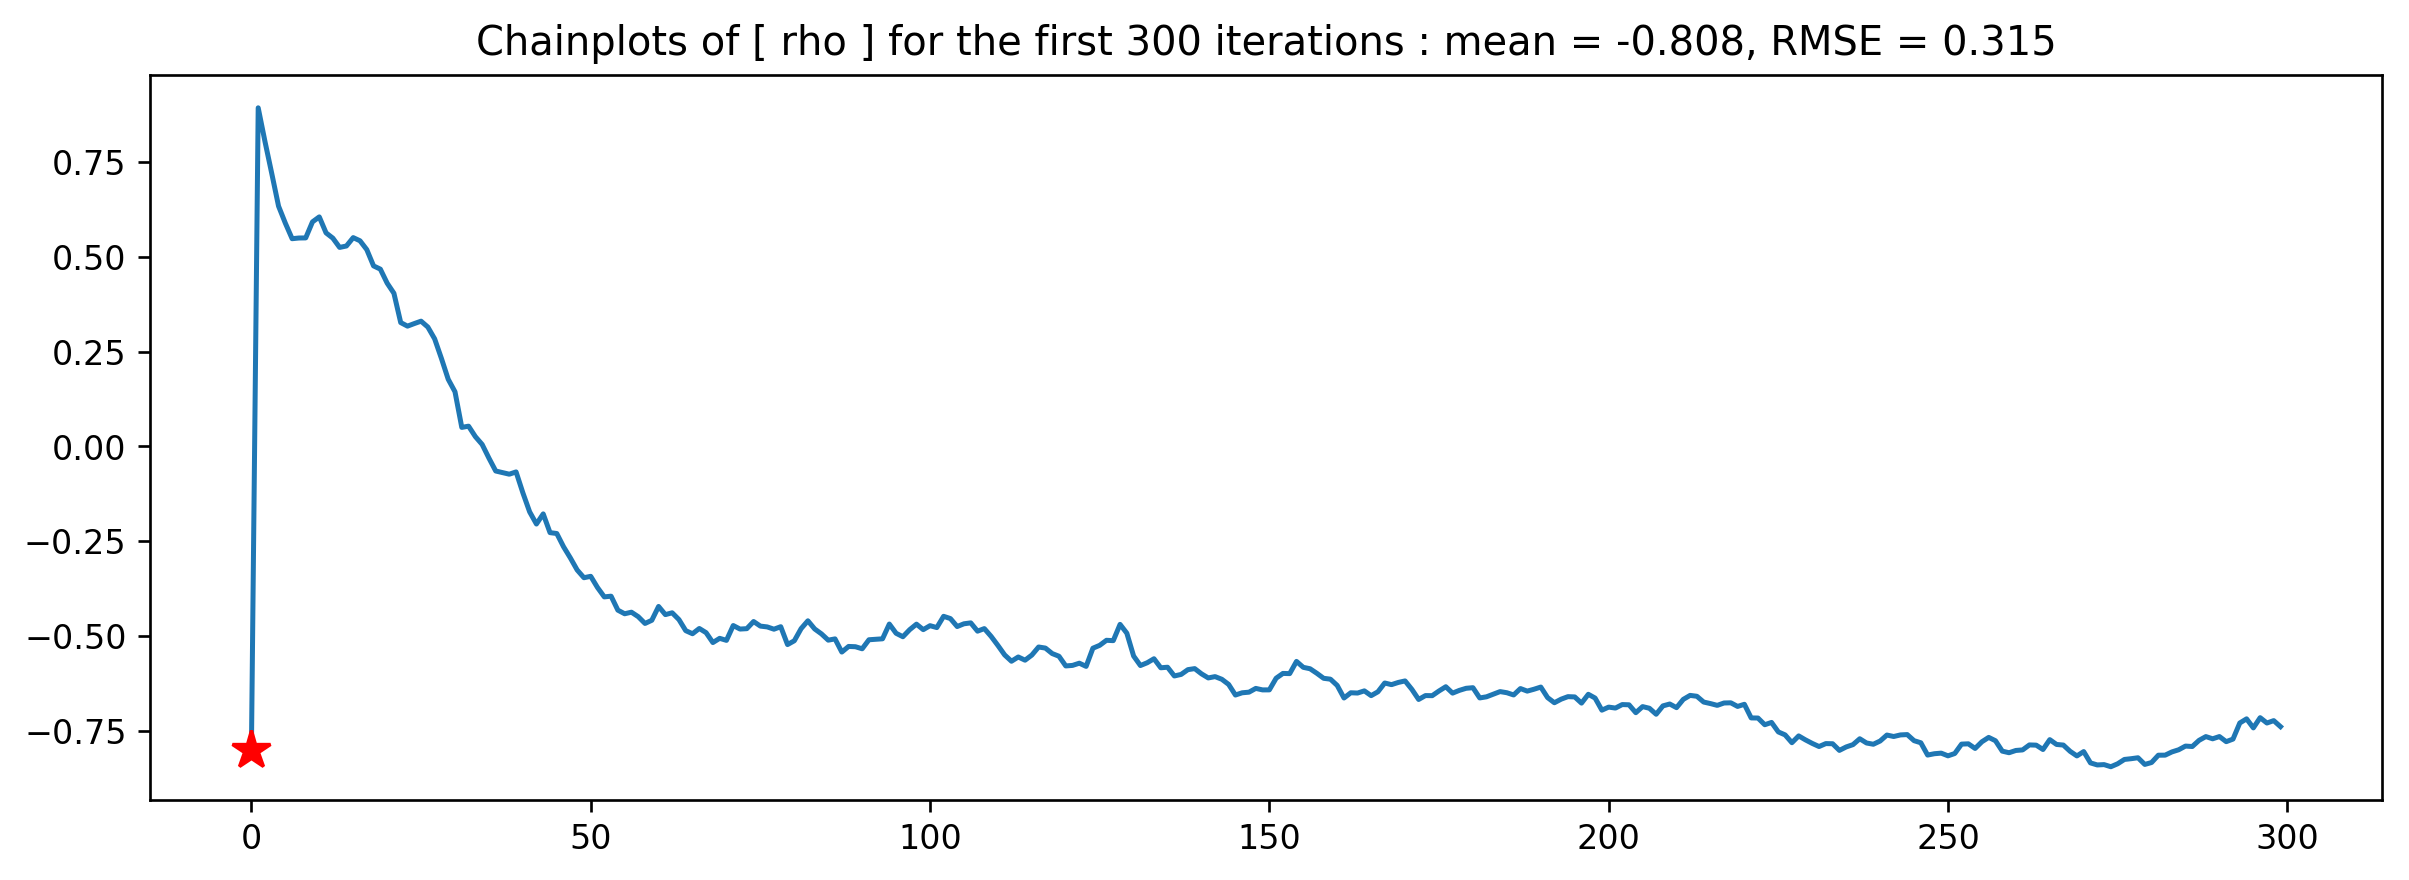

In [4]:
def plotChainplot(data, string_post, file_tag):
        
    string_pre = "Chainplots of [ "
    
    n=len(data)
    E_mu=np.array(data["E_mu"]).astype(float)
    beta=np.array(data["beta"]).astype(float)
    sigma_y=np.array(data["sigma_y"]).astype(float)
    sigma_mu=np.array(data["sigma_mu"]).astype(float)
    rho=np.array(data["rho"]).astype(float)
    t=np.arange(0,n,1)

    fig1=plt.figure(1, figsize=[12,4], dpi=240)
    plt.plot(t, E_mu)
    plt.plot(0,E_mu_init,"r*", markersize=12)
    plt.title(string_pre+'E_mu'+string_post+" : mean = "+str(path_mean[0])+", RMSE = "+str(path_rmse[0]))
    plt.show()
    fig1.savefig("E_mu"+file_tag+".png", dpi=fig1.dpi)

    fig2=plt.figure(2, figsize=[12,4], dpi=240)
    plt.plot(t, beta)
    plt.plot(0,beta_init,"r*", markersize=12)
    plt.title(string_pre+'beta'+string_post+" : mean = "+str(path_mean[1])+", RMSE = "+str(path_rmse[1]))
    plt.show()
    fig2.savefig("beta"+file_tag+".png", dpi=fig2.dpi)

    fig3=plt.figure(3, figsize=[12,4], dpi=240)
    plt.plot(t, sigma_y)
    plt.plot(0,sigma_y_init,"r*", markersize=12)
    plt.title(string_pre+'sigma_y'+string_post+" : mean = "+str(path_mean[2])+", RMSE = "+str(path_rmse[2]))
    plt.show()
    fig3.savefig("sigma_y"+file_tag+".png", dpi=fig3.dpi)

    fig4=plt.figure(4, figsize=[12,4], dpi=240)
    plt.plot(t, sigma_mu)
    plt.plot(0,sigma_mu_init,"r*", markersize=12)
    plt.title(string_pre+'sigma_mu'+string_post+" : mean = "+str(path_mean[3])+", RMSE = "+str(path_rmse[3]))
    plt.show()
    fig4.savefig("sigma_mu"+file_tag+".png", dpi=fig4.dpi)

    fig5=plt.figure(5, figsize=[12,4], dpi=240)
    plt.plot(t, rho)
    plt.plot(0,rho_init,"r*", markersize=12)
    plt.title(string_pre+'rho'+string_post+" : mean = "+str(path_mean[4])+", RMSE = "+str(path_rmse[4]))
    plt.show()
    fig5.savefig("rho"+file_tag+".png", dpi=fig5.dpi)

## Total period
data_burnin=data[burnin_period:n]
path_mean=data_burnin.mean()
path_var=data_burnin.var()
path_bias=row2-path_mean
path_rmse=np.sqrt(pow(path_bias,2)+path_var)

path_mean=["%.3f" % member for member in path_mean]
path_rmse=["%.3f" % member for member in path_rmse]

## Total period
string_total = " ] for 50000 iterations"
plotChainplot(data, string_total, "_total")

## First period
data_first=data.head(first_period)
string_first = " ] for the first " + str(first_period)+ " iterations"
plotChainplot(data_first, string_first, "_first")

## Latent Variable

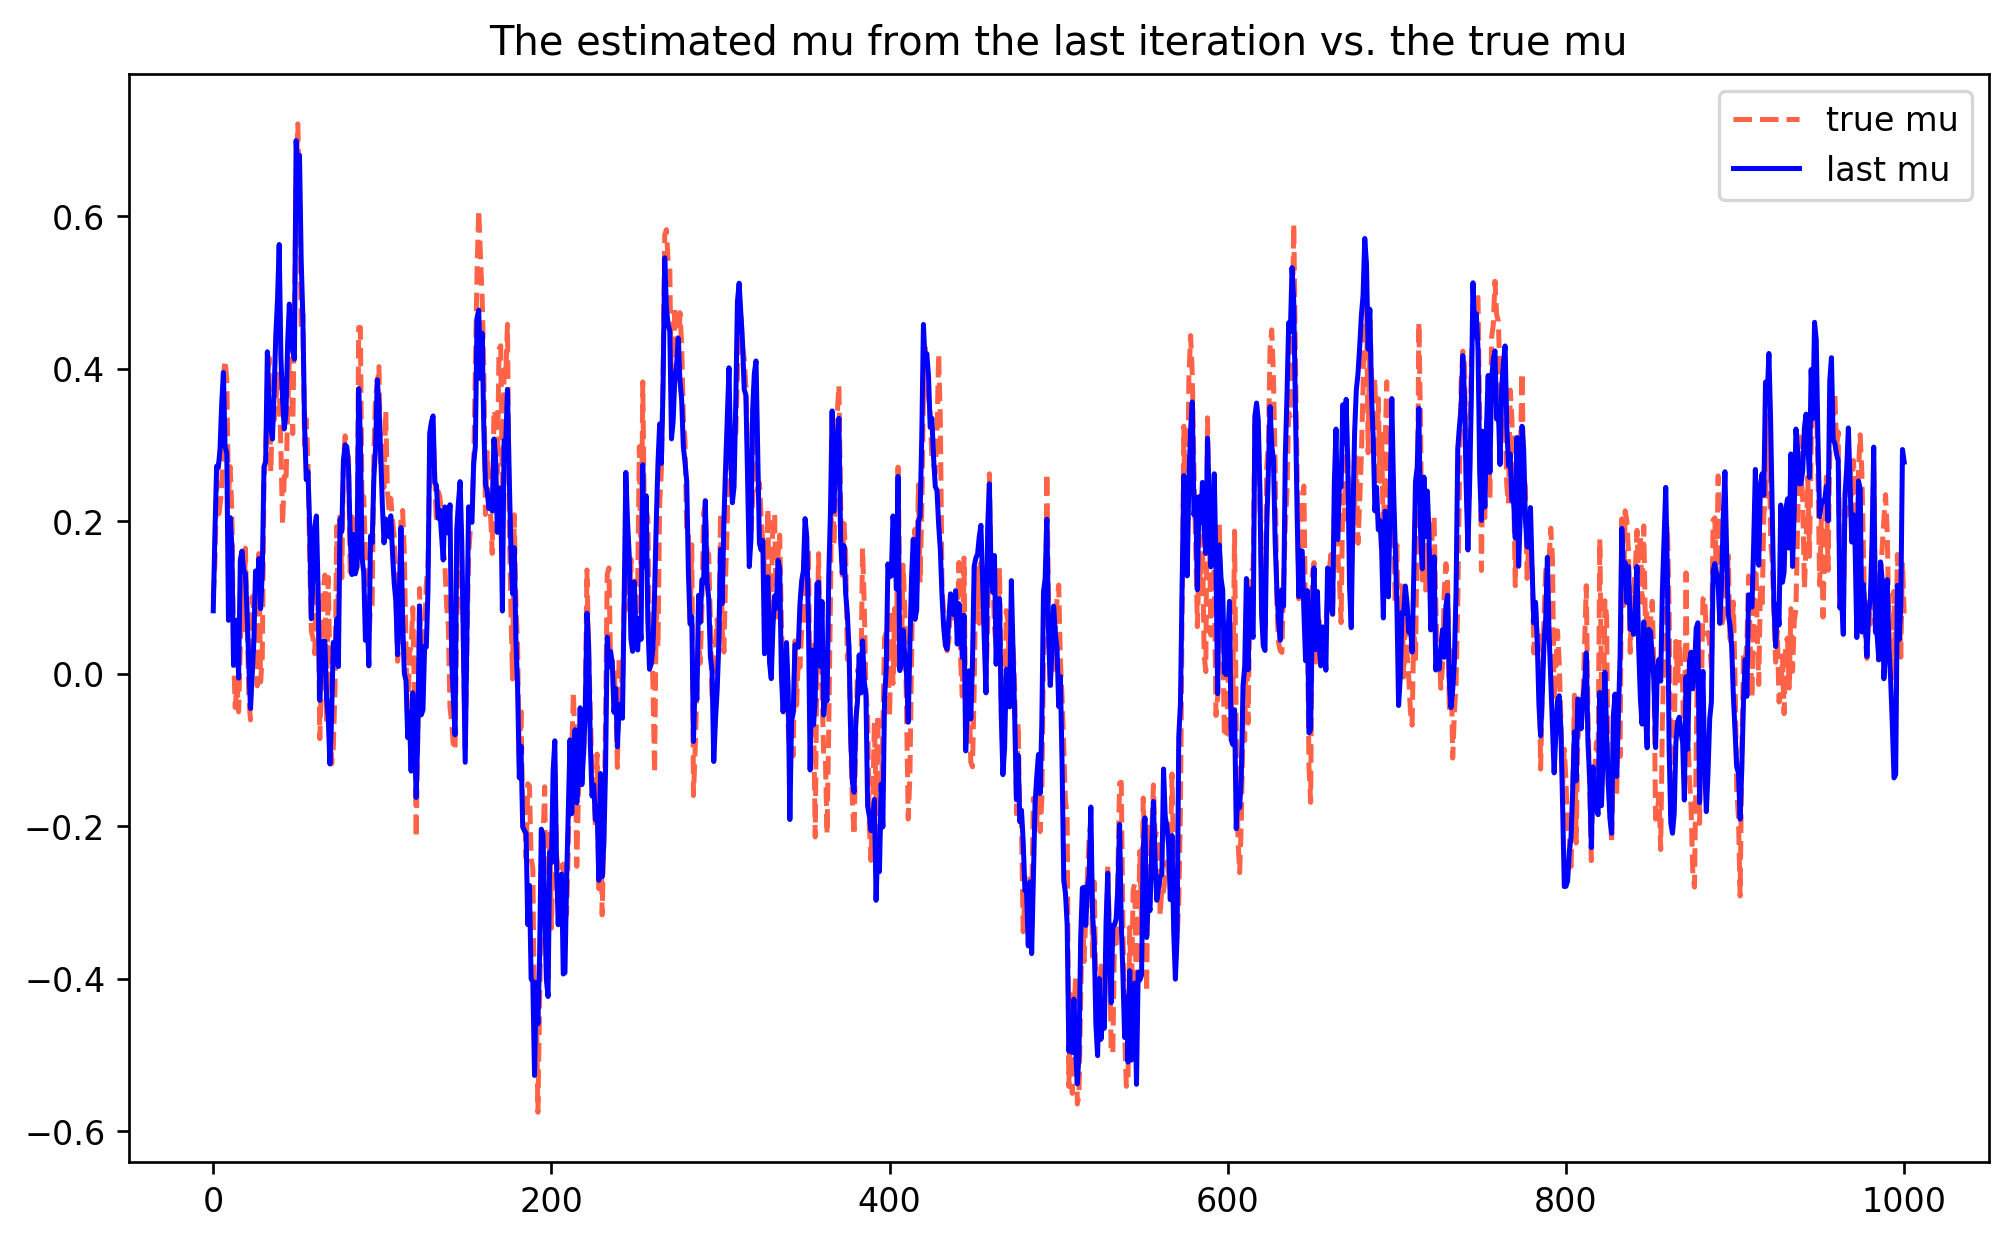

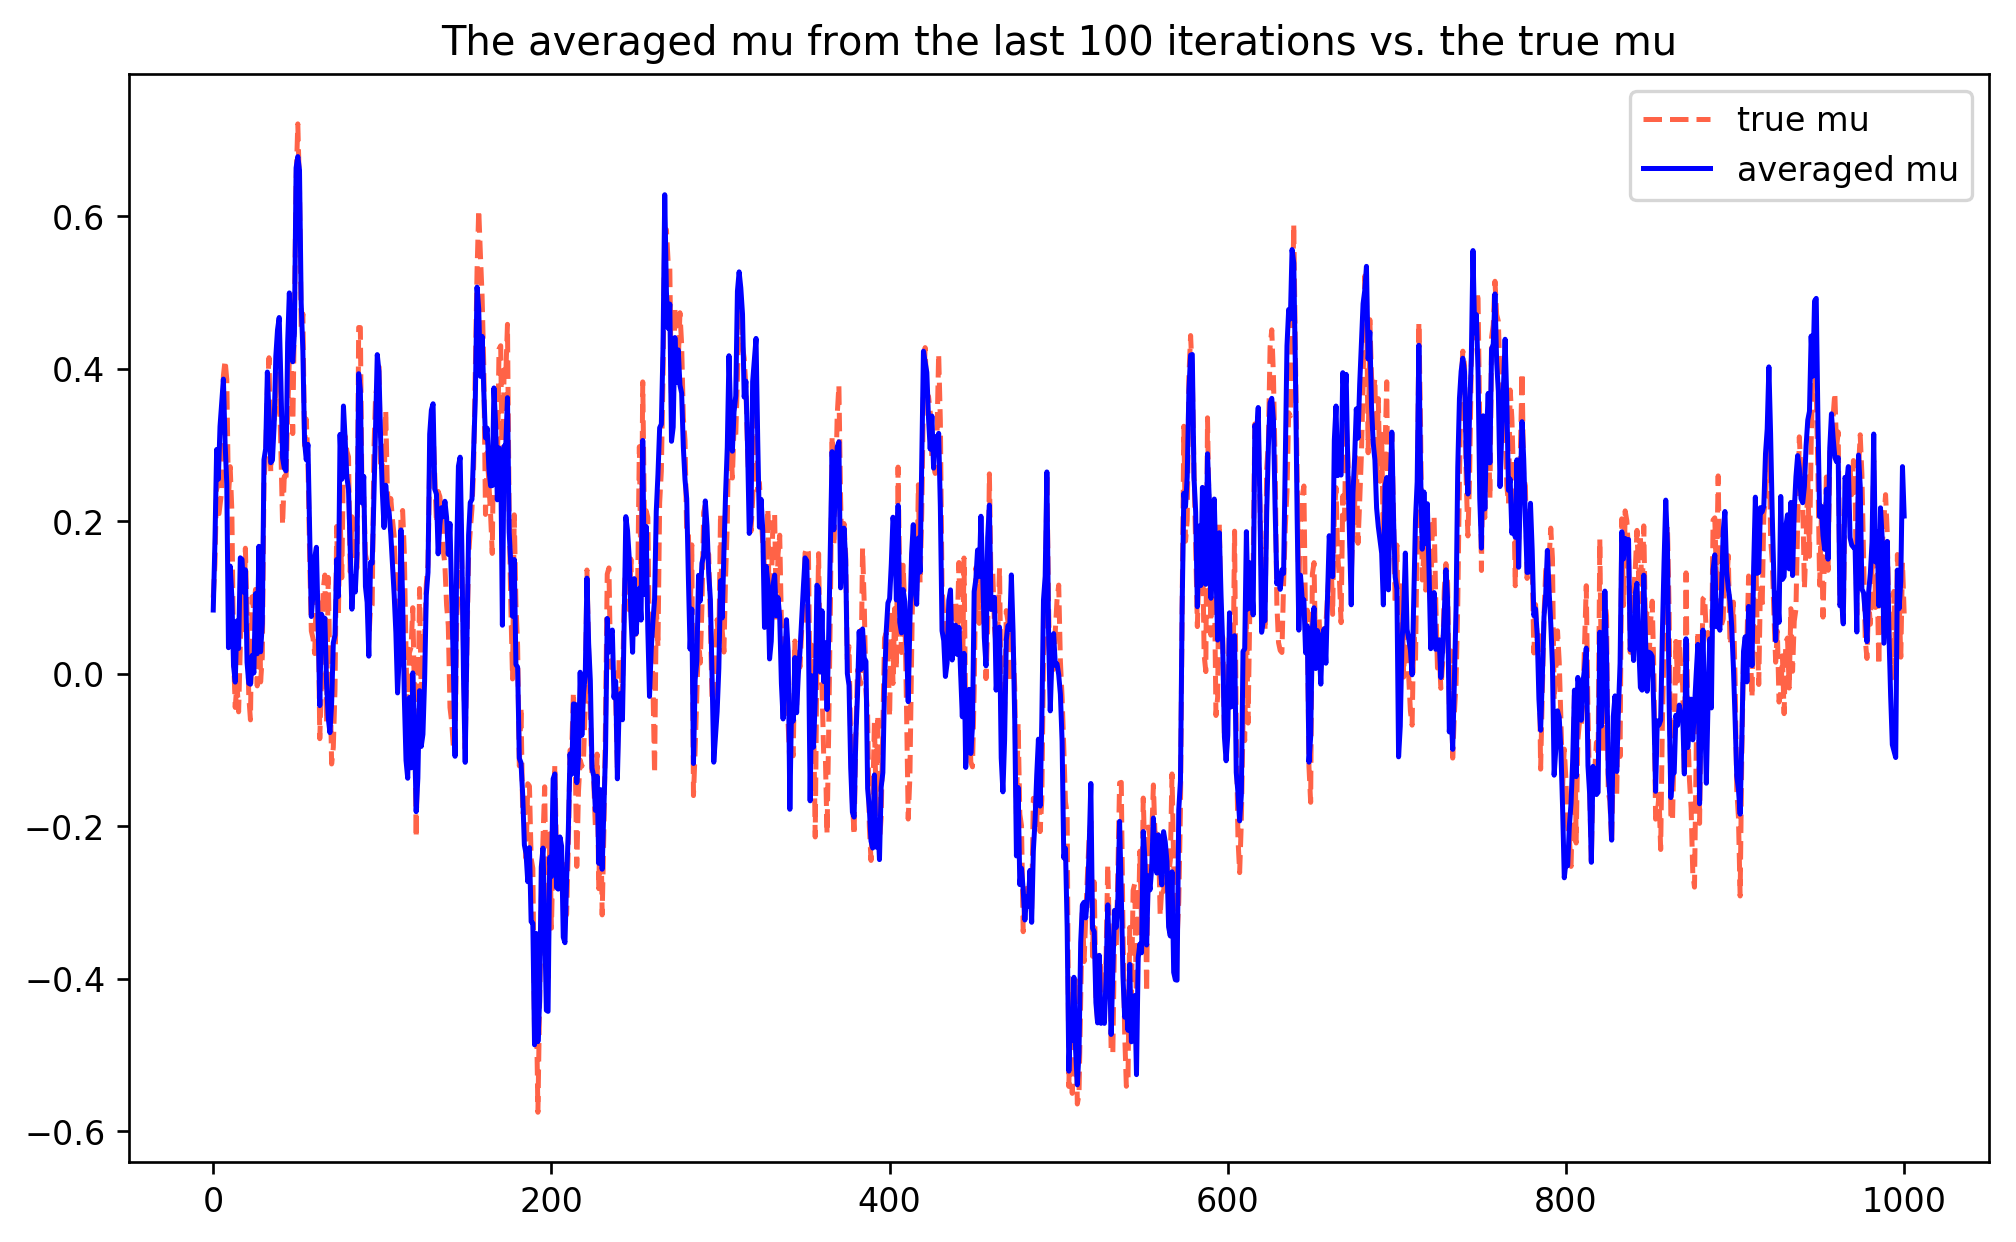

In [5]:
mu_true=np.array(data_simul["mu"]).astype(float)
mu_last=np.array(data_latent["last"]).astype(float)
mu_mean=np.array(data_latent["mean"]).astype(float)
t_mu=np.arange(0,len(mu_true),1)

fig_mu1=plt.figure(1, figsize=[10,6], dpi=240)
plt.plot(t_mu,mu_true,"tomato",linestyle="--",label="true mu")
plt.plot(t_mu,mu_last,"blue",label="last mu")
plt.title("The estimated mu from the last iteration vs. the true mu")
plt.legend()
plt.show()
fig_mu1.savefig("mu_last.png", dpi=fig_mu1.dpi)

fig_mu2=plt.figure(2, figsize=[10,6], dpi=240)
plt.plot(t_mu,mu_true,"tomato",linestyle="--",label="true mu")
plt.plot(t_mu,mu_mean,"blue",label="averaged mu")
plt.title("The averaged mu from the last 100 iterations vs. the true mu")
plt.legend()
plt.show()
fig_mu2.savefig("mu_mean.png", dpi=fig_mu2.dpi)